In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from gurobipy import *
import pickle
from itertools import chain, combinations



In [2]:
df = pd.read_csv("data.csv", sep=";", index_col=0)

In [3]:
df.head()

,Action idea name,Idea avg,Idea stdev,Idea N,Hiilineutraalisuus carbon neutrality (avg),Hiilineutraalisuus (stdev),Hiilineutraalisuus (N),Varautuminen Resilience (avg),Varautuminen (stdev),Varautuminen (N),...,11,12,13,14,15,16,17,18,19,20
Idea #,,,,,,,,,,,,,,,,,,,,,
1,(1) Promoting the energy efficiency of buildin...,"2,45","1,83",11,"2,67","1,89",3,3,"0,82",3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(2) Enabling decentralized energy production f...,"2,3","1,62",10,"2,33","0,47",3,"3,33","0,94",3,...,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,(3) Development and deployment of non-combusti...,"2,4","2,06",10,"3,67","0,47",3,3,"0,82",3,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,(4) Promoting the production of renewable ener...,"2,3","1,85",10,"3,67","0,47",3,"2,33","0,94",3,...,NaN,NaN,NaN,NaN,NaN,NaN,"1, -1",NaN,NaN,NaN
5,(5) Improving energy self-sufficiency to prepa...,2,"1,67",10,"1,33","0,47",3,"3,67","0,47",3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(df["Action idea name"]) + ["Number of changed decisions"]

['(1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy',
 '(2) Enabling decentralized energy production from a security of supply perspective',
 '(3) Development and deployment of non-combustion energy technologies and energy storage',
 '(4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy',
 '(5) Improving energy self-sufficiency to prepare for energy supply disruptions',
 '(6) Oil and peat are used only as maintenance security fuels in energy production',
 '(7) Improving the climate resilience of arable farming and forests',
 '(8) Ensuring the sustainable production, use and renewal of biomass',
 '(9) Climate management and use of forests. The growth condition of forests is taken care of and the development of forest carbon balances is monitored',
 '(10) Promoting the development of manure treatment methods and the use of manure for biogas and fertilizer production',
 '(11) Improv

In [5]:
df.columns

Index(['Action idea name', 'Idea avg  ', 'Idea stdev  ', 'Idea N  ',
       'Hiilineutraalisuus carbon neutrality (avg)  ',
       'Hiilineutraalisuus (stdev)  ', 'Hiilineutraalisuus (N)  ',
       'Varautuminen Resilience (avg)  ', 'Varautuminen (stdev)  ',
       'Varautuminen (N)  ', 'Negatiiviset vaikutukset (neg. impact)  (avg)  ',
       'Negatiiviset vaikutukset  (stdev)  ',
       'Negatiiviset vaikutukset  (N)  ', 'Positiiviset vaikutukset (avg)  ',
       'Positiiviset vaikutukset (stdev)  ', 'Positiiviset vaikutukset (N)  ',
       'index', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')

In [6]:
int_col =[str(i) for i in range(1,21)]

In [7]:
pos_subsets = []
neg_subsets = []

for i in range(1,21): #for loop for row
    for j in range(1,21): #for loop for columns
        val = df[int_col].loc[i][str(j)]
        print((i,j))
        print(val)
        if val == 1.0 or val == "1":
            print("pos")
            pos_subsets.append((i-1, j-1))
        elif val == "1, -1" or val == '1, -1 ':
            pos_subsets.append((i-1,j-1))
            neg_subsets.append((i-1,j-1))
        elif val == -1.0 or val == "-1":
            neg_subsets.append((i-1,j-1))
        else:
            pass

(1, 1)
nan
(1, 2)
nan
(1, 3)
nan
(1, 4)
1
pos
(1, 5)
1.0
pos
(1, 6)
1.0
pos
(1, 7)
-1
(1, 8)
nan
(1, 9)
-1
(1, 10)
nan
(1, 11)
nan
(1, 12)
nan
(1, 13)
nan
(1, 14)
nan
(1, 15)
nan
(1, 16)
nan
(1, 17)
nan
(1, 18)
nan
(1, 19)
nan
(1, 20)
nan
(2, 1)
nan
(2, 2)
nan
(2, 3)
1.0
pos
(2, 4)
nan
(2, 5)
1.0
pos
(2, 6)
-1.0
(2, 7)
nan
(2, 8)
nan
(2, 9)
nan
(2, 10)
nan
(2, 11)
nan
(2, 12)
nan
(2, 13)
1
pos
(2, 14)
1.0
pos
(2, 15)
nan
(2, 16)
nan
(2, 17)
nan
(2, 18)
nan
(2, 19)
nan
(2, 20)
nan
(3, 1)
nan
(3, 2)
-1.0
(3, 3)
nan
(3, 4)
1, -1
(3, 5)
nan
(3, 6)
1.0
pos
(3, 7)
nan
(3, 8)
nan
(3, 9)
nan
(3, 10)
nan
(3, 11)
nan
(3, 12)
nan
(3, 13)
nan
(3, 14)
nan
(3, 15)
1.0
pos
(3, 16)
nan
(3, 17)
nan
(3, 18)
nan
(3, 19)
nan
(3, 20)
nan
(4, 1)
nan
(4, 2)
1.0
pos
(4, 3)
nan
(4, 4)
nan
(4, 5)
1.0
pos
(4, 6)
nan
(4, 7)
nan
(4, 8)
nan
(4, 9)
nan
(4, 10)
nan
(4, 11)
nan
(4, 12)
nan
(4, 13)
nan
(4, 14)
nan
(4, 15)
nan
(4, 16)
nan
(4, 17)
1, -1
(4, 18)
nan
(4, 19)
nan
(4, 20)
nan
(5, 1)
nan
(5, 2)
1.0
pos
(5, 3)

In [8]:
class Project:
    def __init__(self, num=0, desc=0, a1=0, a2=0, w=[1/2, 1/2], cost=1):
        self.num = num
        self.desc = desc
        self.a1 = a1
        self.a2 = a2    
        self.cost = cost
        self.w = w
                
    def cal_value(self):
        self.value = (self.a1/4)*self.w[0] + (self.a2/4)*self.w[1]
        
    def describe(self):
        print("Project " + self.desc)
        print("a1: ", self.a1)
        print("a2: ", self.a2)
        print("cost: ", self.cost)
        print("w: ", self.w)
        print("value: ", self.value)
        

In [9]:
project_list = []
for i in range(20):
    r = df.iloc[i]
    
    p = Project(num=i+1)
    p.desc = r["Action idea name"]
    p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
    p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
    p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
    p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
    p.cal_value()
    
    project_list.append(p)

In [10]:
effect_dict = {}
for subset in pos_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].pos_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].pos_impact]
    
for subset in neg_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].neg_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].neg_impact]


In [11]:
effect_dict

{(0, 3): [3.67],
 (0, 4): [3.67],
 (0, 5): [3.67],
 (1, 2): [3.5, -1.5],
 (1, 4): [3.5, 3.0],
 (1, 12): [3.5, 2.67],
 (1, 13): [3.5, 3.33],
 (2, 3): [3.5, -1.5],
 (2, 5): [3.5, -2.33],
 (2, 14): [3.5],
 (1, 3): [3.5],
 (3, 4): [3.5, -0.5],
 (3, 16): [3.5, 3.5, -1.0],
 (2, 4): [3.0],
 (4, 7): [3.0, 4.0],
 (1, 5): [2.33, -0.5],
 (5, 14): [2.33],
 (5, 18): [2.33],
 (0, 6): [4.0, -0.5],
 (6, 8): [4.0, 4.0, -1.0],
 (6, 12): [4.0, 0.0],
 (1, 7): [4.0],
 (7, 12): [4.0],
 (7, 14): [4.0],
 (1, 9): [3.67],
 (4, 9): [3.67],
 (9, 12): [3.67],
 (1, 10): [2.67],
 (4, 10): [2.67],
 (10, 12): [2.67, 2.67],
 (10, 15): [2.67],
 (2, 11): [3.0],
 (4, 12): [2.67],
 (12, 13): [2.67, 3.33],
 (4, 13): [3.33],
 (13, 15): [3.33],
 (1, 14): [3.0],
 (4, 14): [3.0],
 (6, 14): [3.0],
 (12, 14): [3.0],
 (8, 15): [3.5, -2.0],
 (12, 15): [3.5],
 (1, 16): [3.5],
 (6, 17): [2.5, 0.0],
 (12, 17): [2.5],
 (0, 8): [-0.5],
 (4, 5): [-0.5, -2.33],
 (5, 12): [-2.33],
 (7, 17): [-0.33],
 (5, 11): [-0.33],
 (15, 17): [-2.0]}

In [12]:
int_df = pd.DataFrame(np.nan, index = list(range(0,20)), columns = list(range(0,20))) 

In [13]:
for k,v in effect_dict.items():
    int_df.iloc[k[0], k[1]] = np.mean(v)

In [14]:
int_df.to_csv("inter_effect.csv", sep = ";", decimal="," )

In [15]:
w = [0.67, 0.33]
for project in project_list:
    project.w = w
    project.cal_value()
    project.describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.694725
Project (2) Enabling decentralized energy production from a security of supply perspective
a1:  2.33
a2:  3.33
cost:  1
w:  [0.67, 0.33]
value:  0.665
Project (3) Development and deployment of non-combustion energy technologies and energy storage
a1:  3.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.862225
Project (4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy
a1:  3.67
a2:  2.33
cost:  1
w:  [0.67, 0.33]
value:  0.8069500000000001
Project (5) Improving energy self-sufficiency to prepare for energy supply disruptions
a1:  1.33
a2:  3.67
cost:  1
w:  [0.67, 0.33]
value:  0.5255500000000001
Project (6) Oil and peat are used only as maintenance security fuels in energy production
a1:  3.33
a2:  2.33
cost:  1
w:  [0.67, 0.33]
value:  0.75
Project (7) Improvin

In [16]:
class SolveProblem:
    def __init__(self, budget_const_pct, effect_dict, project_list):
        self.budget_const_pct = budget_const_pct
        self.effect_dict = effect_dict
        
        self.m = len(project_list)
        self.project_values = [x.value for x in project_list]
        self.project_costs = [x.cost for x in project_list] 
        
        self.optimal_portfolios = []
        self.optimal_values = []
        
        self.interaction_effects_dict = {}
        
    def run(self):
        
        #A model that generates the first optimal solution
        model = Model("Portfolio opimization - Additive")   

        #Indexes
        projects = range(len(project_list))

        z = []

        for i in projects:
            z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
        model.update()

        #budget constraints
        self.budget = self.budget_const_pct * sum(self.project_costs)

        model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
        model.update()

        #objective function
        model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects))
        model.modelSense = GRB.MAXIMIZE
        model.update()

        #optimize the model
        model.optimize()

        #Collect optimal decision variables

        sol_dict = {}
        sol_list = model.getVars()
        
        for i in range(self.m):
            sol_dict[sol_list[i].VarName] = sol_list[i].X
        
        self.optimal_portfolios.append(sol_dict)
        self.optimal_values.append(model.objVal)
        
        for beta in list(np.arange(0, 1.2, 0.01)):
            
            self.interaction_subsets = []
            self.interaction_effects = []

            for k, v in self.effect_dict.items():
                
                subset = list([k[0], k[1]])
                alpha = np.mean(v)
                u_1 = self.project_values[subset[0]]
                u_2 = self.project_values[subset[1]]

                S_k = (alpha/4)*beta*u_1*u_2
                
                self.interaction_subsets.append(subset)
                self.interaction_effects.append(S_k)
                
            output = np.zeros((len(self.interaction_subsets), 20))
            for i, ix in enumerate(self.interaction_subsets):
                output[i][ix] = 1
            self.interaction_subsets_binary = output.T
            self.interaction_subsets_size = output.sum(axis=1)
            
            self.interaction_effects_dict[beta] = self.interaction_effects
            
                                    
            model = Model("Portfolio optimization - with interaction")

            J = self.m #rename the number of project for the simplicity
            
            #select interaction subsets that should be included in the model
            interaction_subsets = self.interaction_subsets
            interaction_subsets_binary = self.interaction_subsets_binary
            interaction_subsets_size = self.interaction_subsets_size
            interaction_effects= self.interaction_effects
    
            
            #Indexes for the model
            projects = range(J)
            interactions = range(len(self.interaction_subsets))

            #Decision variables z_j
            z = []
            for i in projects:
                z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
            model.update()

            #Decision variable g_k
            g = []
            for k in interactions:
                g.append(model.addVar(vtype=GRB.BINARY, name="g_%d" % (k)))
            model.update()

            #budget constraints
            self.budget = self.budget_const_pct * sum(self.project_costs)

            model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
            model.update()

            #interaction constraints left hand side
            for k in interactions:
                model.addConstr(quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + 1 <= J*g[k])
            model.update()
            
            #interaction constraints right hand side
            for k in interactions:
                model.addConstr(J*g[k] <= quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + J)
            model.update()
            
            #objective function
            model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects) + quicksum(g[k]*interaction_effects[k] for k in interactions))

            model.modelSense = GRB.MAXIMIZE
            model.update()

            #optimize the model
            model.optimize()

            sol_dict = {}
            sol_list = model.getVars()
            for i in range(J + len(self.interaction_subsets)):
                sol_dict[sol_list[i].VarName] = sol_list[i].X
                
            self.optimal_portfolios.append(sol_dict)
            self.optimal_values.append(model.objVal)
            print("Beta: ", beta)
        
        
        return self.optimal_portfolios

In [17]:
def make_project(w):
    project_list = []
    for i in range(20):
        r = df.iloc[i]

        p = Project(num=i+1)
        p.desc = r["Action idea name"]
        p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
        p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
        p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
        p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
        p.w = w
        p.cal_value()

        project_list.append(p)
    return project_list

In [18]:
p1 = make_project([0.5, 0.5])
p2 = make_project([0.67, 0.33])
p3 = make_project([1,0])

In [33]:
p2[0].

In [19]:
s2 = SolveProblem(budget_const_pct=0.5, effect_dict=effect_dict, project_list=p2)
s2.run()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-06-08
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xd73f89d9
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 7.7764000
Presolve removed 1 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 8.33585 7.7764 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.335850000000e+00, best bound 8.335850000000e+00, gap 0.0000%
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (

Beta:  0.04
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xf9458fda
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-03, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.0876551

Root relaxation: objective 8.771518e+00, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.77152    0   24    8.08766    8.77152  8.46

Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.3989102

Root relaxation: objective 9.314688e+00, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.31469    0   22    8.39891    9.31469  10.9%     -    0s
H    0     0                       8.9958181    9.31469  3.54%     -    0s
     0     0     cutoff    0         8.99582    8.99582  0.00%     -    0s

Cutting planes:
  Gomory: 5
  Cover: 14
  RLT: 7

Explored 1 nodes (45 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 8.99582 8.39891 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.995818115203e+00, best bound 8.995818115203e+00, gap 0.0000%
Beta:  0.1
Gurobi Optimizer vers


Cutting planes:
  Gomory: 4
  Cover: 18
  Clique: 2
  RLT: 7

Explored 1 nodes (67 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 9.38316 8.71017 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.383164672805e+00, best bound 9.383164672805e+00, gap 0.0000%
Beta:  0.15
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x202cbb9b
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e-03, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 bina

     0     0    9.85658    0    1    9.82308    9.85658  0.34%     -    0s
     0     0     cutoff    0         9.82308    9.82308  0.00%     -    0s

Cutting planes:
  Gomory: 11
  Cover: 19
  Clique: 6
  RLT: 8

Explored 1 nodes (70 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 9.82308 9.77051 9.02142 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.823076622286e+00, best bound 9.823076622286e+00, gap 0.0000%
Beta:  0.2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xb40d63db
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.165

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.98648    0   19    9.33268   10.98648  17.7%     -    0s
H    0     0                      10.2934958   10.98648  6.73%     -    0s
     0     0   10.40185    0    5   10.29350   10.40185  1.05%     -    0s
     0     0   10.35431    0   21   10.29350   10.35431  0.59%     -    0s
     0     0     cutoff    0        10.29350   10.29350  0.00%     -    0s

Explored 1 nodes (82 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 10.2935 9.33268 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.029349577786e+01, best bound 1.029349577786e+01, gap 0.0000%
Beta:  0.25
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x3c857398
Variable types: 0 con

H    0     0                      10.7639149   11.59550  7.73%     -    0s
     0     0   10.94019    0    6   10.76391   10.94019  1.64%     -    0s
H    0     0                      10.7667588   10.94019  1.61%     -    0s
     0     0     cutoff    0        10.76676   10.76676  0.00%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 11
  Clique: 1
  RLT: 8

Explored 1 nodes (81 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 10.7668 10.7639 9.64393 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.076675883063e+01, best bound 1.076675883063e+01, gap 0.0000%
Beta:  0.3
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xf40e756c
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   12.20451    0   19    9.95519   12.20451  22.6%     -    0s
H    0     0                      11.2343341   12.20451  8.64%     -    0s
     0     0   11.43703    0   26   11.23433   11.43703  1.80%     -    0s
H    0     0                      11.2701061   11.43703  1.48%     -    0s
     0     0   11.37925    0    9   11.27011   11.37925  0.97%     -    0s
     0     0   11.28160    0   19   11.27011   11.28160  0.10%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 13
  Clique: 1
  RLT: 7

Explored 1 nodes (88 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 11.2701 11.2343 9.95519 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.127010613573e+01, best bound 1.127010613573e+01, gap 0.0000%
Beta:  0.35000000000000003
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical co

Found heuristic solution: objective 10.2664408

Root relaxation: objective 1.282670e+01, 22 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   12.82670    0   17   10.26644   12.82670  24.9%     -    0s
H    0     0                      11.7734534   12.82670  8.95%     -    0s
     0     0   11.91762    0    6   11.77345   11.91762  1.22%     -    0s
     0     0   11.87462    0    2   11.77345   11.87462  0.86%     -    0s
     0     0   11.77678    0    9   11.77345   11.77678  0.03%     -    0s

Cutting planes:
  Gomory: 6
  Cover: 9
  Clique: 1
  RLT: 7

Explored 1 nodes (86 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 11.7735 10.2664 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.177345344084e+01, best bound 1.177345344084e+01, g

     0     0 infeasible    0        12.27680   12.27680  0.00%     -    0s

Cutting planes:
  Gomory: 7
  Cover: 7
  RLT: 6

Explored 1 nodes (81 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 12.2768 10.5777 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.227680074594e+01, best bound 1.227680074594e+01, gap 0.0000%
Beta:  0.45
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xf9af920a
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x3aaa73ed
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 10.9512020

Root relaxation: objective 1.422370e+01, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.22370    0   17   10.95120   14.22370  29.9%     -    0s
H    0     0                      12.8808175   14.22370 

Beta:  0.55
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xb1e9ee62
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 11.2624571

Root relaxation: objective 1.485871e+01, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.85871    0   17   11.26246   14.85871  31

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x39b4033f
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 11.5737121

Root relaxation: objective 1.549371e+01, 27 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   15.49371    0   17   11.57371   15.49371  33.9%     -    0s
H    0     0                      13.8875121   15.49371 

Beta:  0.65
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xa6bb35fc
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 11.8849672

Root relaxation: objective 1.612871e+01, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   16.12871    0   17   11.88497   16.12871  35

Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x3623e873
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 12.1962223

Root relaxation: objective 1.676371e+01, 29 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   16.76371    0   17   12.19622   16.76371  37.5%     -    0s
H    0     0                      14.8942067   16.76371  12.6%     -    0s
     0     0   15.24956    0    4   14.89421   15.24956  

Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 12.5074774

Root relaxation: objective 1.739872e+01, 31 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   17.39872    0   17   12.50748   17.39872  39.1%     -    0s
H    0     0                      15.3975540   17.39872  13.0%     -    0s
     0     0   15.78194    0    4   15.39755   15.78194  2.50%     -    0s
     0     0 infeasible    0        15.39755   15.39755  0.00%     -    0s

Cutting planes:
  Gomory: 11
  Cover: 9
  RLT: 7

Explored 1 nodes (86 simplex iterations) in 0.08 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 15.3976 12.5075 4.

Found heuristic solution: objective 12.8187325

Root relaxation: objective 1.803372e+01, 31 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   18.03372    0   17   12.81873   18.03372  40.7%     -    0s
H    0     0                      15.9009013   18.03372  13.4%     -    0s
     0     0   16.28640    0   18   15.90090   16.28640  2.42%     -    0s
     0     0   16.28360    0    6   15.90090   16.28360  2.41%     -    0s
     0     0 infeasible    0        15.90090   15.90090  0.00%     -    0s

Cutting planes:
  Gomory: 13
  Cover: 12
  RLT: 7

Explored 1 nodes (109 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 15.9009 12.8187 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.590090134269e+01, best bound 1.590090134269e+01, gap 0.0000

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   18.66872    0   17   13.12999   18.66872  42.2%     -    0s
H    0     0                      16.4042486   18.66872  13.8%     -    0s
     0     0   16.82731    0   19   16.40425   16.82731  2.58%     -    0s
     0     0   16.70266    0    3   16.40425   16.70266  1.82%     -    0s
     0     0 infeasible    0        16.40425   16.40425  0.00%     -    0s

Cutting planes:
  Gomory: 9
  Cover: 11
  RLT: 6

Explored 1 nodes (116 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 16.4042 13.13 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.640424864780e+01, best bound 1.640424864780e+01, gap 0.0000%
Beta:  0.86
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Mo


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   19.30372    0   17   13.44124   19.30372  43.6%     -    0s
H    0     0                      16.9075960   19.30372  14.2%     -    0s
     0     0   17.25632    0    3   16.90760   17.25632  2.06%     -    0s
     0     0   16.97522    0   10   16.90760   16.97522  0.40%     -    0s

Cutting planes:
  Gomory: 10
  Cover: 8
  Clique: 1
  RLT: 7

Explored 1 nodes (96 simplex iterations) in 0.13 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 16.9076 13.4412 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.690759595290e+01, best bound 1.690759595290e+01, gap 0.0000%
Beta:  0.91
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326

H    0     0                      17.4109433   19.93873  14.5%     -    0s
     0     0   17.90271    0   15   17.41094   17.90271  2.82%     -    0s
     0     0   17.84613    0   13   17.41094   17.84613  2.50%     -    0s
     0     0     cutoff    0        17.41094   17.41094  0.00%     -    0s

Cutting planes:
  Gomory: 9
  Cover: 13
  MIR: 1
  Zero half: 1
  RLT: 9

Explored 1 nodes (99 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 17.4109 13.7525 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.741094325801e+01, best bound 1.741094325801e+01, gap 0.0000%
Beta:  0.96
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xed9bb230
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+

H    0     0                      17.9142906   20.57373  14.8%     -    0s
     0     0   18.43269    0   26   17.91429   18.43269  2.89%     -    0s
     0     0   18.37876    0   13   17.91429   18.37876  2.59%     -    0s
     0     0   18.15571    0    1   17.91429   18.15571  1.35%     -    0s
     0     0     cutoff    0        17.91429   17.91429  0.00%     -    0s

Cutting planes:
  Gomory: 11
  Cover: 12
  MIR: 1
  RLT: 10

Explored 1 nodes (102 simplex iterations) in 0.19 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 17.9143 14.0638 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.791429056311e+01, best bound 1.791429056311e+01, gap 0.0000%
Beta:  1.01
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xf5dc31a9
Variable types: 0 continuous, 71 inte


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.20873    0   17   14.37501   21.20873  47.5%     -    0s
H    0     0                      18.4176379   21.20873  15.2%     -    0s
     0     0   18.98799    0   15   18.41764   18.98799  3.10%     -    0s
     0     0   18.97624    0    4   18.41764   18.97624  3.03%     -    0s
     0     0 infeasible    0        18.41764   18.41764  0.00%     -    0s

Cutting planes:
  Gomory: 10
  Cover: 10
  RLT: 7

Explored 1 nodes (105 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 18.4176 14.375 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.841763786822e+01, best bound 1.841763786822e+01, gap 0.0000%
Beta:  1.06
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up

Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 14.8730161

Root relaxation: objective 2.222474e+01, 35 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.22474    0   17   14.87302   22.22474  49.4%     -    0s
H    0     0                      19.2229936   22.22474  15.6%     -    0s
     0     0   19.84923    0   15   19.22299   19.84923  3.26%     -    0s
     0     0   19.82805    0    4   19.22299   19.82805  3.15%     -    0s
     0     0 infeasible    0        19.22299   19.22299  0.00%     -    0s

Cutting planes:
  Gomory: 7
  Cover: 10
  RLT: 7

Explored 1 nodes (107 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Soluti

Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 15.1842712

Root relaxation: objective 2.285974e+01, 37 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.85974    0   17   15.18427   22.85974  50.5%     -    0s
H    0     0                      19.7263409   22.85974  15.9%     -    0s
     0     0   20.50431    0    8   19.72634   20.50431  3.94%     -    0s
     0     0     cutoff    0        19.72634   19.72634  0.00%     -    0s

Cutting planes:
  Gomory: 11
  Cover: 11
  RLT: 8

Explored 1 nodes (108 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 19.7263 15.1843 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.972634086149e+01, best bound 1.97263

[{'z_0': 0.0,
  'z_1': 0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': 0.0,
  'z_11': 1.0,
  'z_12': 0.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': 0.0,
  'z_16': 0.0,
  'z_17': 0.0,
  'z_18': 1.0,
  'z_19': 0.0},
 {'z_0': -0.0,
  'z_1': -0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': -0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': -0.0,
  'z_11': 1.0,
  'z_12': -0.0,
  'z_13': -0.0,
  'z_14': 1.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': 1.0,
  'z_19': -0.0,
  'g_0': -0.0,
  'g_1': -0.0,
  'g_2': -0.0,
  'g_3': -0.0,
  'g_4': -0.0,
  'g_5': -0.0,
  'g_6': -0.0,
  'g_7': 1.0,
  'g_8': 1.0,
  'g_9': 1.0,
  'g_10': -0.0,
  'g_11': -0.0,
  'g_12': -0.0,
  'g_13': -0.0,
  'g_14': -0.0,
  'g_15': -0.0,
  'g_16': 1.0,
  'g_17': 1.0,
  'g_18': -0.0,
  'g_19': 1.0,
  'g_20': -0.0,
  'g_21': -0.0,
  'g_22': -0.0,
  'g_23': 1.0,
  'g_24': -0.0,
  'g_25': -0.0,
  'g_26': 

In [20]:
def draw_table2(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    d3 = pd.DataFrame(d2)
    d3.columns = [round(x, 2) for x in d3.columns]
    d3 = d3.astype(int)
    
    d_list = []

    for col in d3.columns:
        d_list.append(sum(abs(d3[0]-d3[col])))
        
    d3 = d3.append(pd.Series(d_list , index=d3.columns),ignore_index=True)
    d3= d3.set_index(pd.Index(list(df["Action idea name"]) + ["Number of changed decisions"]))
    return d3

In [21]:
def make_list_integer(l):
    return [int(x) for x in list(l)]

In [22]:
for i in range(len(s2.interaction_effects_dict)):
    a = make_list_integer(s2.optimal_portfolios[i].values())[:20] == make_list_integer(s2.optimal_portfolios[i+1].values())[:20]
    if not a:
        print(i)
        print(list(s2.interaction_effects_dict.keys())[i])

3
0.03
4
0.04
17
0.17
30
0.3


In [30]:
y_ticks_labels = ["Action "+ str(i) for i in range(1,21)]

In [24]:
def raw_table(p):
    rd = {}
    for i in range(len(p.optimal_portfolios)):
        rd[i] = list(p.optimal_portfolios[i].values())[:20]
    df = pd.DataFrame(rd)
    #df.loc[10] = [10*x for x in p.n_incorrect()]
    return df.astype(int)

In [25]:
betas = list(s2.interaction_effects_dict.keys())

In [26]:
from matplotlib.patches import Rectangle


In [27]:
from matplotlib.ticker import FormatStrFormatter


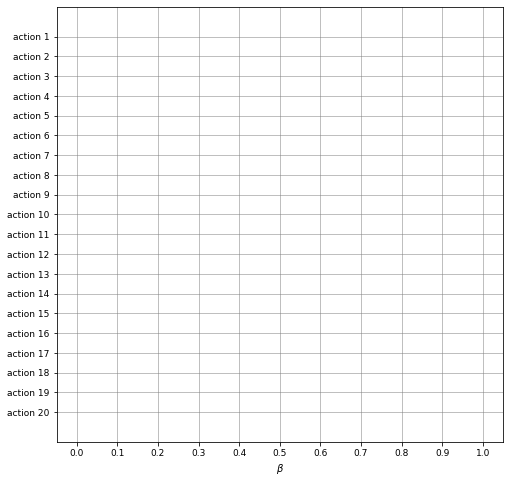

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
#create simple line plot

ax.plot([0, 1],[0, 20], alpha=0)
#ax.title
ax.set_xticks(list(np.arange(0,1.1,0.1)))
ax.set_yticks(np.arange(0.5,20,1))
[ax.axhline(y=i, color="gray", linewidth=0.5) for i in list(np.arange(0.5,20,1))]
[ax.axvline(x=i, color="gray", linewidth=0.5) for i in list(np.arange(0,1.1,0.1))]

ax.set_yticklabels(y_ticks_labels[::-1], fontsize=9)
ax.set_xticklabels(np.arange(0,1.1,0.1), fontsize=9)
ax.set_xlabel(r"$\beta$")
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


plt.show()

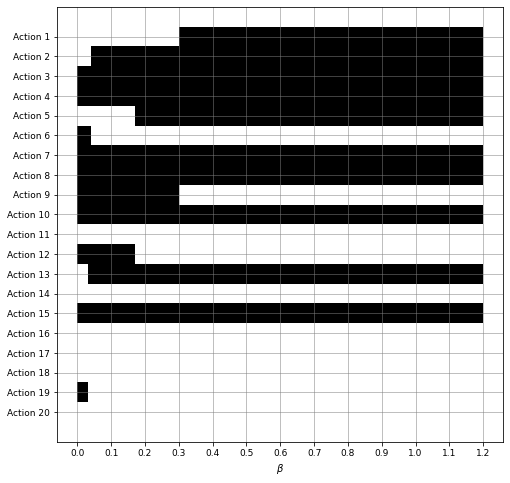

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
#create simple line plot

ax.plot([0, 1.2],[0, 20], alpha=0)
#ax.title
ax.set_xticks(list(np.arange(0,1.3,0.1)))
ax.set_yticks(np.arange(0.5,20,1))
[ax.axhline(y=i, color="gray", linewidth=0.5) for i in list(np.arange(0.5,20,1))]
[ax.axvline(x=i, color="gray", linewidth=0.5) for i in list(np.arange(0,1.3,0.1))]

ax.set_yticklabels(y_ticks_labels[::-1], fontsize=9)
ax.set_xticklabels(np.arange(0,1.3,0.1), fontsize=9)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlabel(r"$\beta$")
#ax.axvline(1)

for project in range(0,20):
    for inter in range(len(betas)):
        fig_loc = (betas[inter], 19-project)
        val = raw_table(s2).iloc[project, inter+1]
        if val==1:
            ax.add_patch(Rectangle(fig_loc, 0.01, 1,
                         edgecolor = 'black',
                         facecolor = 'black',
                         fill=True,
                         lw=0))

plt.show()

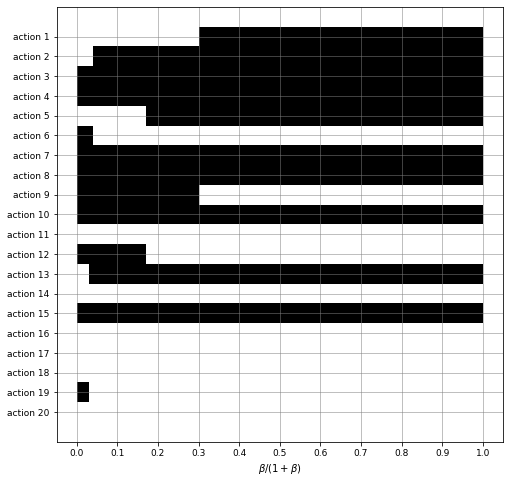

In [68]:
fig, ax = plt.subplots(figsize=(8,8))
#create simple line plot

ax.plot([0, 1],[0, 20], alpha=0)
#ax.title
ax.set_xticks(list(np.arange(0,1.1,0.1)))
ax.set_yticks(np.arange(0.5,20,1))
[ax.axhline(y=i, color="gray", linewidth=0.5) for i in list(np.arange(0.5,20,1))]
[ax.axvline(x=i, color="gray", linewidth=0.5) for i in list(np.arange(0,1.1,0.1))]

ax.set_yticklabels(y_ticks_labels[::-1], fontsize=9)
ax.set_xticklabels(np.arange(0,1.1,0.1), fontsize=9)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlabel(r"$\beta/(1+\beta)$")

for project in range(0,20):
    for inter in range(len(betas)):
        fig_loc = (betas[inter], 19-project)
        val = raw_table(s2).iloc[project, inter+1]
        if val==1:
            ax.add_patch(Rectangle(fig_loc, 0.01, 1,
                         edgecolor = 'black',
                         facecolor = 'black',
                         fill=True,
                         lw=0))

plt.show()

In [61]:
len(betas)

100

In [55]:
raw_table(s2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [53]:
may_portfolio = pd.read_csv("67_33_50_may.csv", sep=";")
may_portfolio.columns

Index(['Unnamed: 0', '0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06',
       '0.07', '0.08', '0.09', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7',
       '0.8', '0.9', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0'],
      dtype='object')

In [54]:
may_portfolio["0.3"]

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     1
8     0
9     1
10    0
11    0
12    1
13    0
14    1
15    0
16    0
17    0
18    0
19    0
20    8
Name: 0.3, dtype: int64

In [92]:
raw_table(s2)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
d_list = []

for col in d2.columns:
    d_list.append(sum(abs(d2[0]-d2[col])))

d3 = d2.append(pd.Series(d_list , index=d2.columns),ignore_index=True)
d3= d3.set_index(pd.Index(list(df["Action idea name"]) + ["Number of changed decisions"]))
d3.style.applymap(lambda x: "background-color: green" if x>0 else "background-color: white")

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
"(1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(2) Enabling decentralized energy production from a security of supply perspective,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
(3) Development and deployment of non-combustion energy technologies and energy storage,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"(4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy",1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
(5) Improving energy self-sufficiency to prepare for energy supply disruptions,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
(6) Oil and peat are used only as maintenance security fuels in energy production,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(7) Improving the climate resilience of arable farming and forests,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
"(8) Ensuring the sustainable production, use and renewal of biomass",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
(9) Climate management and use of forests. The growth condition of forests is taken care of and the development of forest carbon balances is monitored,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(10) Promoting the development of manure treatment methods and the use of manure for biogas and fertilizer production,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [38]:
d_list = []

for col in d2.columns:
    d_list.append(sum(abs(d2[0]-d2[col])))

In [46]:
len(d_list)

28

In [25]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_46270/1982978728.py:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [27]:
draw_graph(s1)

NameError: name 'draw_graph' is not defined

In [256]:
df = draw_table(s2)

In [257]:
df.style.applymap(lambda x: "background-color: green" if x>0 else "background-color: white")

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


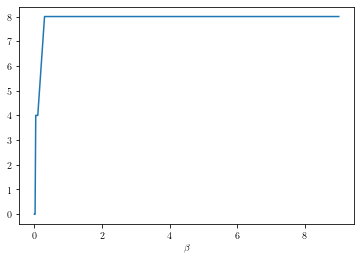

In [237]:
draw_graph(s2)

In [247]:
dict_values = []

for pf in s2.optimal_portfolios:
    dict_values.append(list(pf.values())[:20])
d2 = dict(zip(s2.interaction_effects_dict.keys(), dict_values[1:]))

In [253]:
np.array(d2[0]) - np.array(d2[9])

array([-1., -1.,  0.,  0., -1.,  1.,  0.,  0.,  1.,  0.,  0.,  1., -1.,
       -0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [212]:
def draw_table(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    d3 = pd.DataFrame(d2)
    d3.columns = [round(x, 2) for x in d3.columns]
    d3 = d3.astype(int)
    d3 = d3.set_index(pd.Index(list(range(1,21))))
    return d3

In [255]:
draw_table(s2)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.90,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [223]:
def draw_graph(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    
    diff_dict = {}
    for k,v in d2.items():
        diff_dict[k] = np.sum(abs(np.array(d2[0])-np.array(v)))
    plt.plot(diff_dict.keys(), diff_dict.values())
    plt.xlabel(r"$\beta$")
    
    plt.ylabel("")

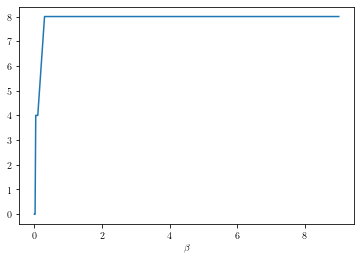

In [262]:
draw_graph(s2)

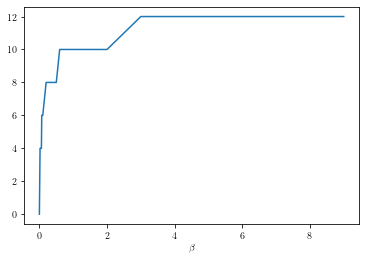

In [261]:
draw_graph(s1)

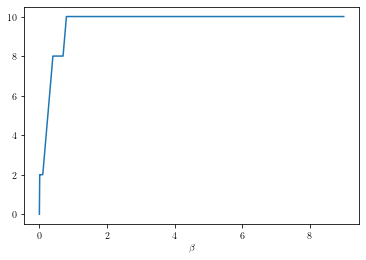

In [263]:
draw_graph(s3)

In [266]:
p1[0].describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [0.5, 0.5]
value:  0.70875


In [265]:
p2[0].describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.694725


In [264]:
p3[0].describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [1, 0]
value:  0.6675


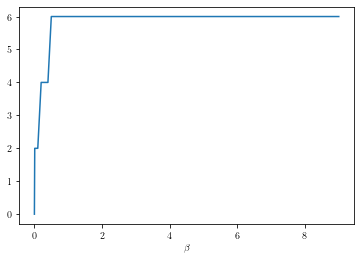

In [227]:
draw_graph(s4)

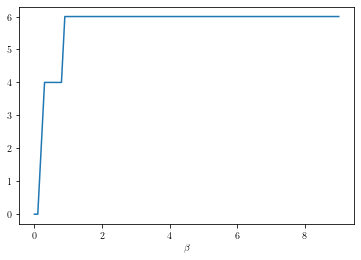

In [228]:
draw_graph(s5)

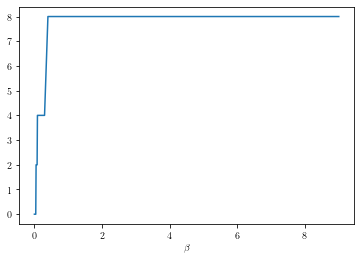

In [231]:
draw_graph(s6)

In [373]:
dict_values = []

for pf in p.optimal_portfolios:
    dict_values.append(list(pf.values())[:20])

In [374]:
d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))

In [375]:
d3 = pd.DataFrame(d2)
d3.columns = [round(x, 1) for x in d3.columns]
d3 = d3.astype(int)

In [376]:
d3.style.applymap(lambda x: "background-color: blue" if x >0 else 'background-color: white')

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [378]:
diff_dict = {}
for k,v in d2.items():
    diff_dict[k] = np.sum(abs(np.array(d2[0])-np.array(v)))

In [219]:
plt.plot(diff_dict.keys(), diff_dict.values())
plt.xlabel("$\beta$")
plt.ylabel("Number of different projects selected")

NameError: name 'diff_dict' is not defined

In [366]:
dict_values = []

for pf in p.optimal_portfolios:
    dict_values.append(list(pf.values())[20:])
    
d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
d3 = pd.DataFrame(d2)
d3.columns = [round(x, 1) for x in d3.columns]
d3 = d3.astype(int)
d3.style.applymap(lambda x: "background-color: blue" if x >0 else 'background-color: white')

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [372]:
np.sum(abs(np.array(d2[0])-np.array(d2[0.1])))

14.0

In [308]:
len(p.interaction_effects_dict.keys())

26

In [314]:
len(p.optimal_portfolios[1:])

26

In [307]:
list(p.optimal_portfolios[13].values())[:20]

[0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 -0.0,
 1.0,
 1.0,
 -0.0,
 1.0,
 1.0,
 1.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0]

In [252]:
np.dot([1,2,3], [0,1,0])

2

In [280]:
p.optimal_portfolios[2]

{'z_0': 0.0,
 'z_1': 1.0,
 'z_2': 1.0,
 'z_3': 0.0,
 'z_4': 1.0,
 'z_5': 0.0,
 'z_6': 1.0,
 'z_7': 1.0,
 'z_8': 1.0,
 'z_9': 1.0,
 'z_10': -0.0,
 'z_11': 1.0,
 'z_12': 1.0,
 'z_13': 0.0,
 'z_14': 1.0,
 'z_15': -0.0,
 'z_16': -0.0,
 'z_17': -0.0,
 'z_18': -0.0,
 'z_19': -0.0,
 'g_0': 0.0,
 'g_1': 0.0,
 'g_2': 0.0,
 'g_3': 1.0,
 'g_4': 1.0,
 'g_5': 1.0,
 'g_6': 0.0,
 'g_7': 0.0,
 'g_8': 0.0,
 'g_9': 1.0,
 'g_10': 0.0,
 'g_11': 0.0,
 'g_12': -0.0,
 'g_13': 1.0,
 'g_14': 1.0,
 'g_15': -0.0,
 'g_16': 0.0,
 'g_17': 0.0,
 'g_18': 0.0,
 'g_19': 1.0,
 'g_20': 1.0,
 'g_21': 1.0,
 'g_22': 1.0,
 'g_23': 1.0,
 'g_24': 1.0,
 'g_25': 1.0,
 'g_26': 1.0,
 'g_27': 0.0,
 'g_28': 0.0,
 'g_29': 0.0,
 'g_30': 0.0,
 'g_31': 1.0,
 'g_32': 1.0,
 'g_33': 0.0,
 'g_34': 0.0,
 'g_35': -0.0,
 'g_36': 1.0,
 'g_37': 1.0,
 'g_38': 1.0,
 'g_39': 1.0,
 'g_40': 0.0,
 'g_41': -0.0,
 'g_42': 0.0,
 'g_43': -0.0,
 'g_44': 0.0,
 'g_45': 0.0,
 'g_46': -0.0,
 'g_47': 0.0,
 'g_48': -0.0,
 'g_49': 0.0,
 'g_50': -0.0}

In [289]:
x = np.dot(list(p.optimal_portfolios[3].values())[:20], p.project_values)
y = np.dot(list(p.optimal_portfolios[3].values())[20:], p.interaction_effects_dict[0.2])
x+y

10.133728697916666

In [270]:
p.optimal_values

[8.33375,
 8.33375,
 9.140551997981774,
 10.13372869791667,
 11.179968046875,
 12.263572528906247,
 13.371340661132812,
 14.479108793359377,
 15.586876925585937,
 16.6946450578125,
 17.802413190039065,
 18.910181322265625]